In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
import distclassipy as dcpy

os.chdir("../")
from pathlib import Path
import matplotlib.gridspec as gridspec
import sys

sys.path.append("scripts")
import utils

In [2]:
with open("settings.txt") as f:
    settings_dict = json.load(f)
seed_val = settings_dict["seed_choice"]
np.random.seed(seed_val)
sns_dict = settings_dict["sns_dict"]
sns.set_theme(**sns_dict)

In [3]:
# custom_hues = ["#3B4CC0", "#1FA187", "#FBAE17", "#D21F26"]
ibm_palette_hues = ["#648FFF", "#785EF0", "#DC267F", "#FE6100", "#FFB000"]
# https://davidmathlogic.com/colorblind/
sns.set_palette(ibm_palette_hues)

In [4]:
all_metrics = settings_dict["all_metrics"]

In [5]:
features = pd.read_parquet("data/allfeatures.parquet")
features["class"].value_counts()

class
EB      98473
RRL     45096
DSCT     8245
CEP      1662
Name: count, dtype: int64

In [13]:
import missingno as msno

In [ ]:
# msno.dendrogram(features)

In [56]:
featuresubset = features.dropna(thresh=0.72*features.shape[0], axis=1)

for col in featuresubset.columns:
    print(col)

g-r
r-i
i-z
Multiband_period
PPE
Period_band_r
delta_period_r
Period_band_i
delta_period_i
Period_band_z
delta_period_z
Period_band_Y
delta_period_Y
Power_rate_1_4
Power_rate_1_3
Power_rate_1_2
Power_rate_2
Power_rate_3
Power_rate_4
Psi_CS_r
Psi_eta_r
Psi_CS_i
Psi_eta_i
Harmonics_mse_g
Harmonics_chi_g
Harmonics_mag_1_g
Harmonics_mag_2_g
Harmonics_phase_2_g
Harmonics_mag_3_g
Harmonics_phase_3_g
Harmonics_mag_4_g
Harmonics_phase_4_g
Harmonics_mag_5_g
Harmonics_phase_5_g
Harmonics_mag_6_g
Harmonics_phase_6_g
Harmonics_mag_7_g
Harmonics_phase_7_g
Harmonics_mse_r
Harmonics_chi_r
Harmonics_mag_1_r
Harmonics_mag_2_r
Harmonics_phase_2_r
Harmonics_mag_3_r
Harmonics_phase_3_r
Harmonics_mag_4_r
Harmonics_phase_4_r
Harmonics_mag_5_r
Harmonics_phase_5_r
Harmonics_mag_6_r
Harmonics_phase_6_r
Harmonics_mag_7_r
Harmonics_phase_7_r
Harmonics_mse_i
Harmonics_chi_i
Harmonics_mag_1_i
Harmonics_mag_2_i
Harmonics_phase_2_i
Harmonics_mag_3_i
Harmonics_phase_3_i
Harmonics_mag_4_i
Harmonics_phase_4_i
Harmonics

<Axes: >

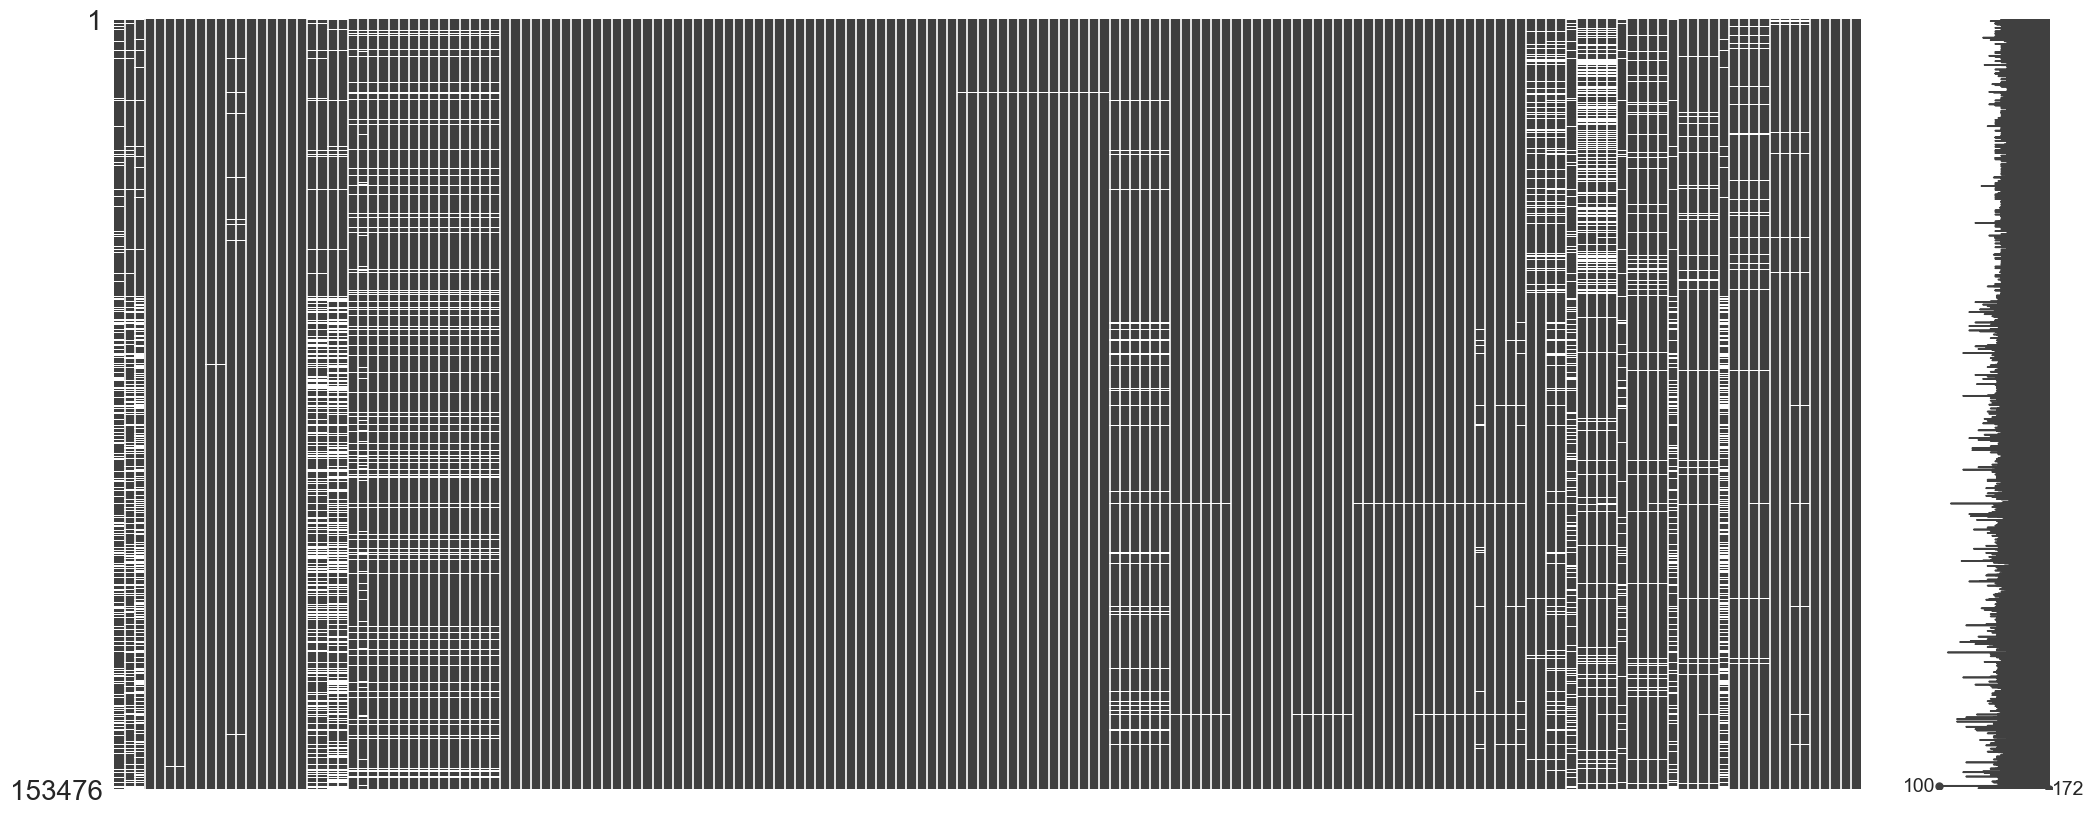

In [57]:
msno.matrix(featuresubset)

In [68]:
featuresubset.isna().sum().sort_values(ascending=False).iloc[:20]

i-z                               41691
Psi_eta_i                         40239
Psi_CS_i                          40239
positive_fraction_z               39526
Psi_eta_r                         32467
Psi_CS_r                          32467
g-r                               31511
max_brightness_after_band_g       29092
median_brightness_after_band_g    29092
n_forced_phot_band_before_g       28355
n_forced_phot_band_after_g        28355
positive_fraction_g               25953
r-i                               25735
Harmonics_chi_g                   21342
positive_fraction_i               21306
median_brightness_after_band_u    17381
max_brightness_after_band_u       17381
Harmonics_mag_2_g                 15167
Harmonics_phase_2_g               15167
Harmonics_phase_6_g               15167
dtype: int64

<Axes: >

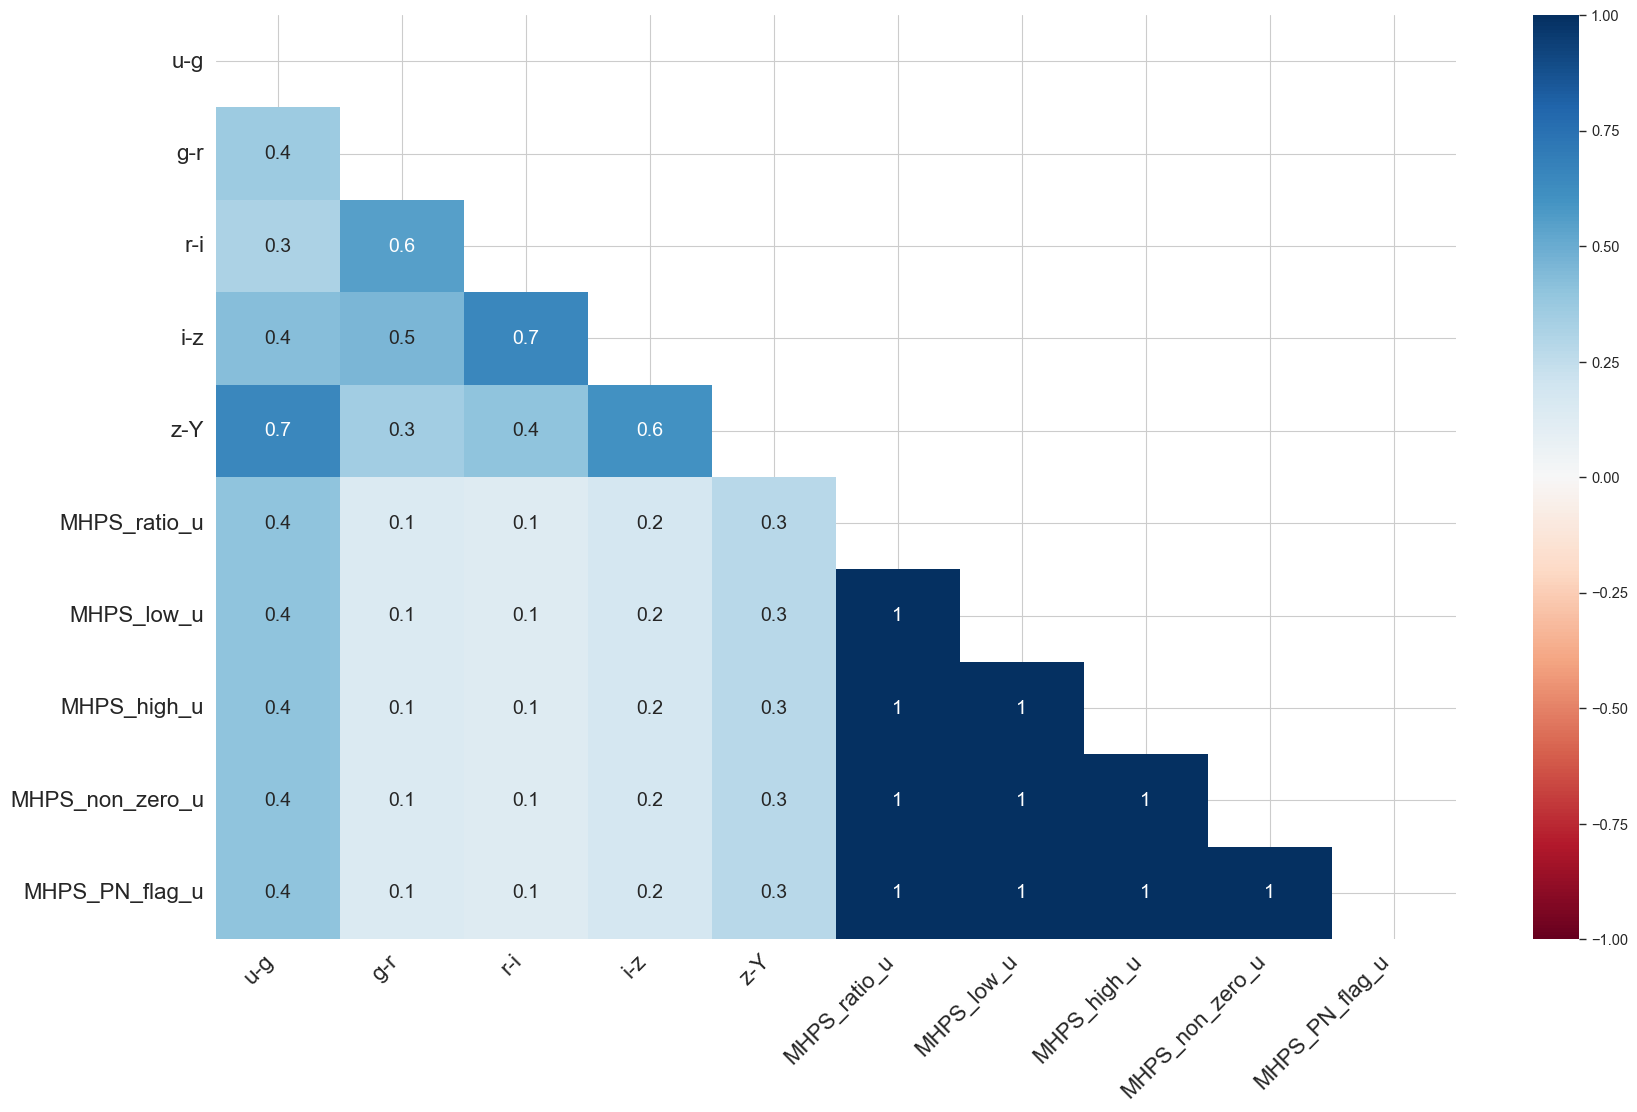

In [24]:
msno.heatmap(features.iloc[:,:10])

<Axes: >

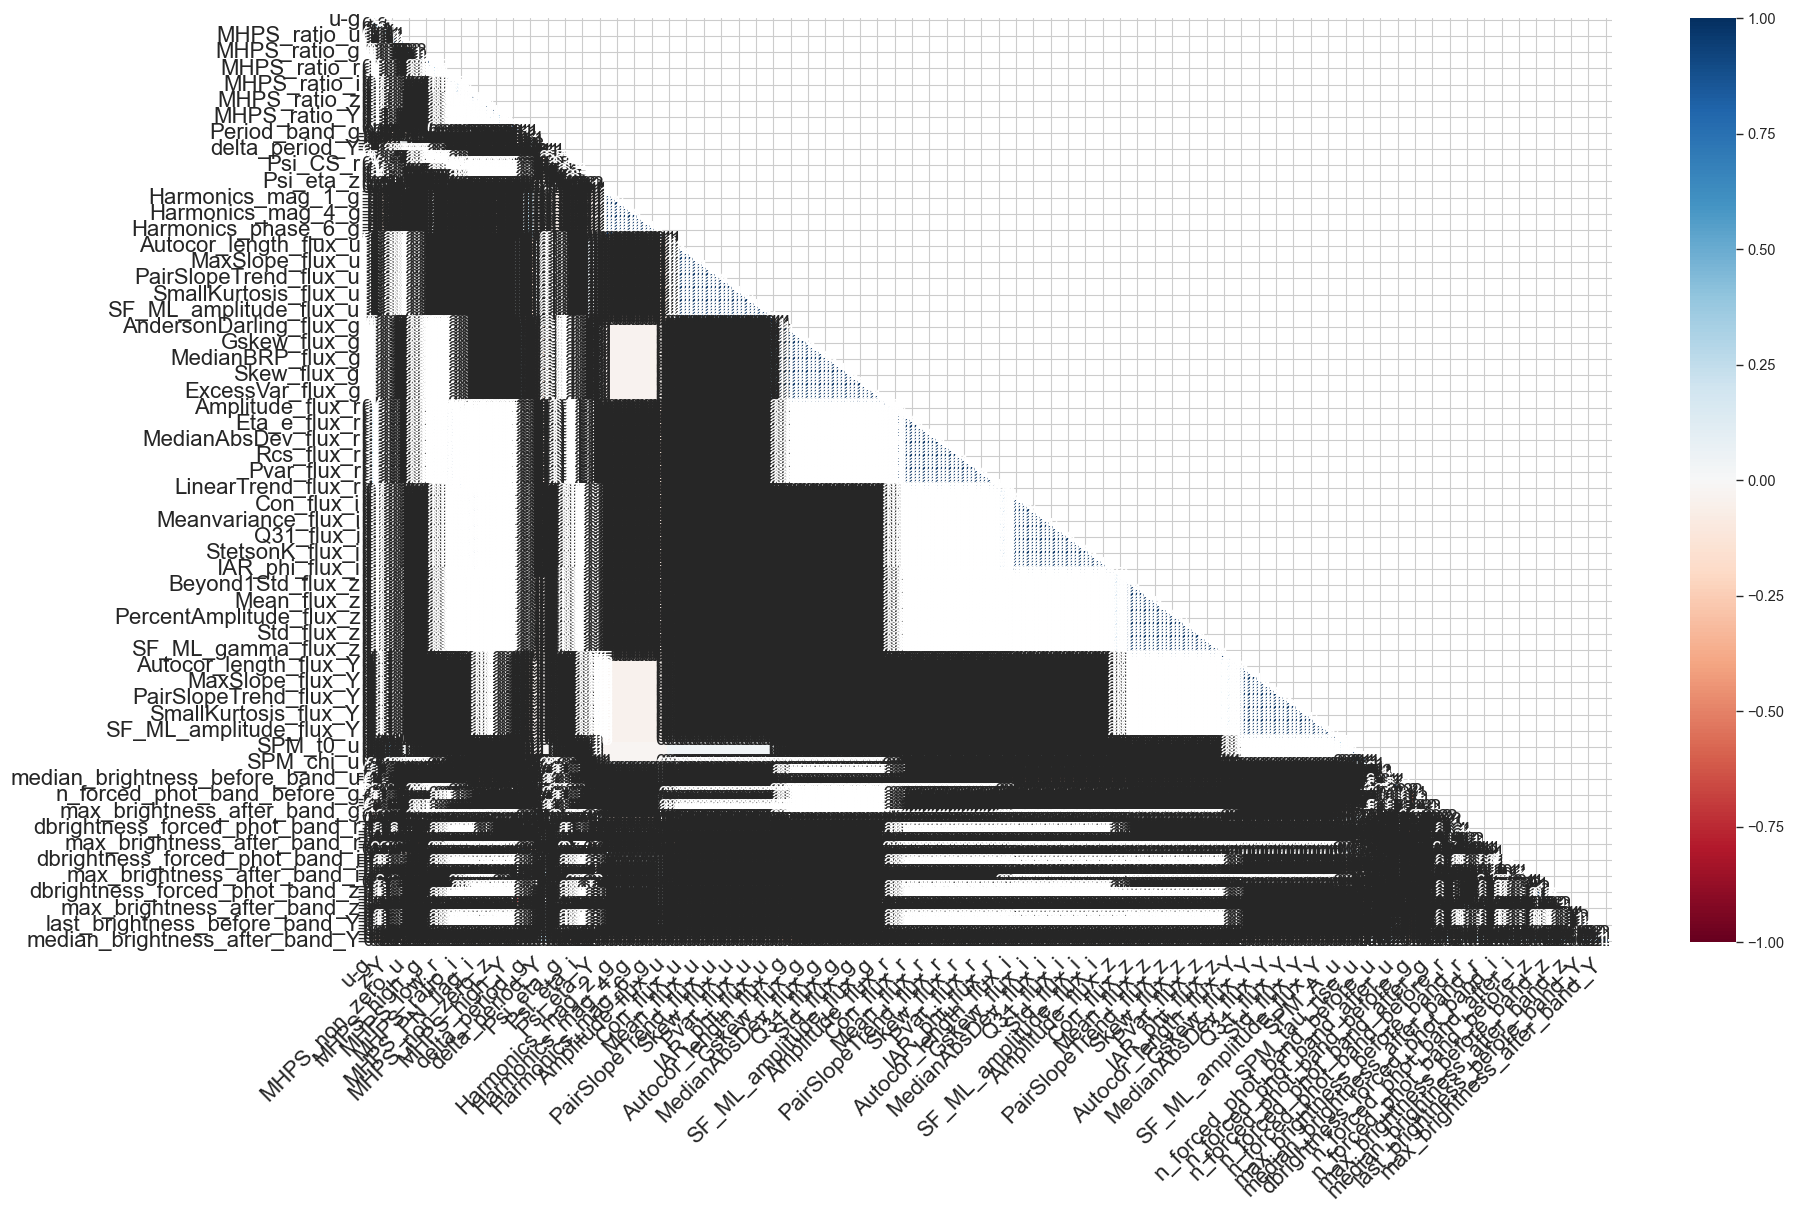

In [19]:
msno.heatmap(features.iloc[:100])

<Axes: >

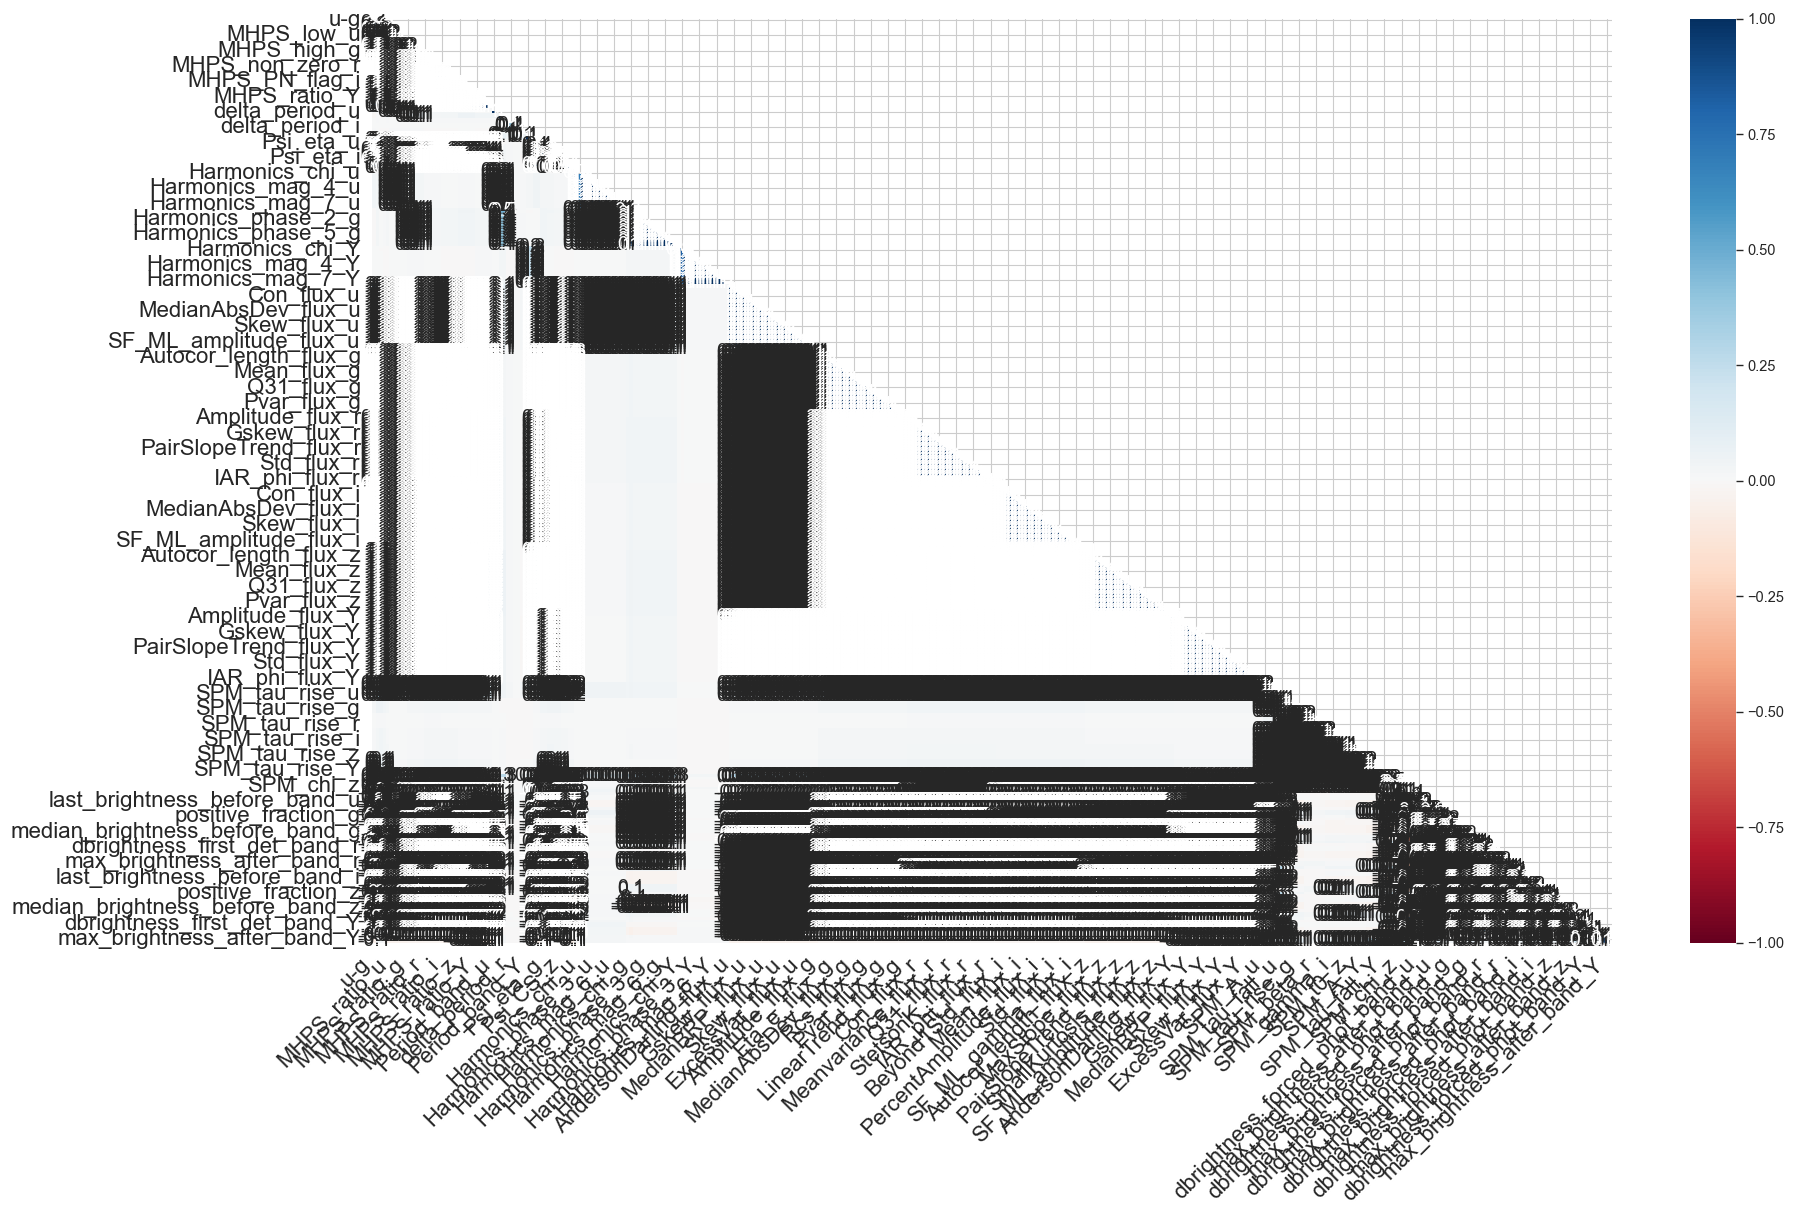

In [18]:
msno.heatmap(features)

<Axes: >

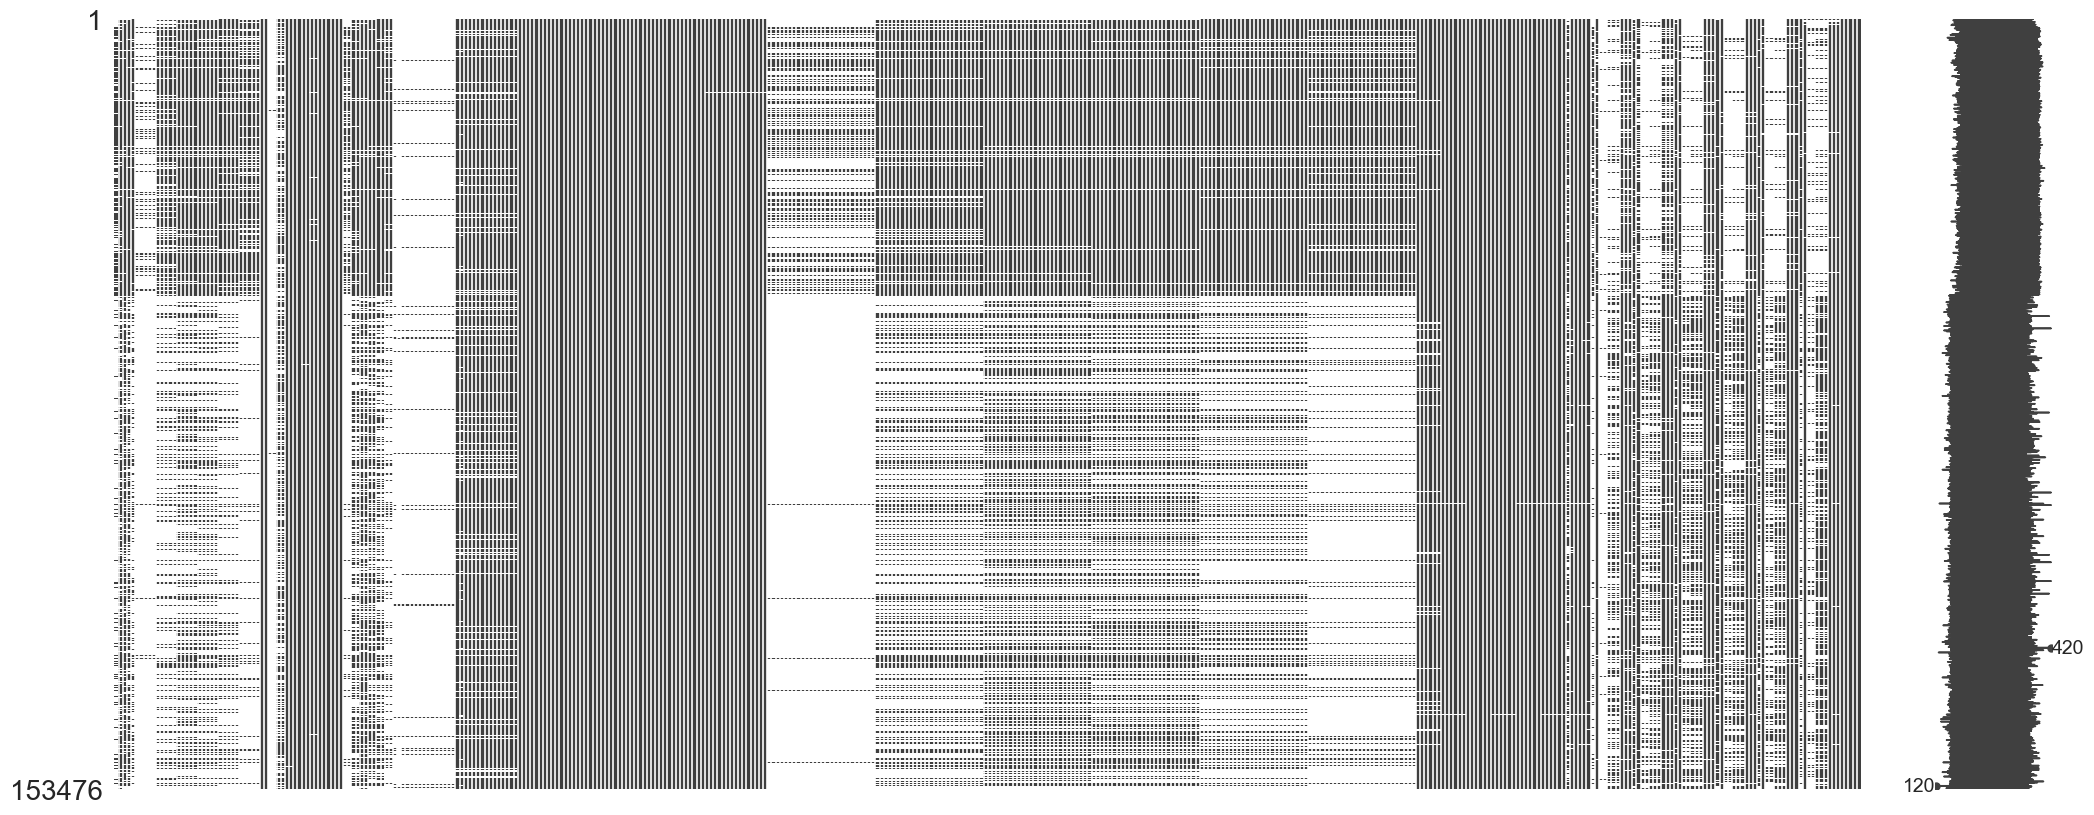

In [16]:
msno.matrix(features)

In [10]:
features.loc[["u-g", "z-Y"]]

,u-g,g-r,r-i,i-z,z-Y,MHPS_ratio_u,MHPS_low_u,MHPS_high_u,MHPS_non_zero_u,MHPS_PN_flag_u,...,max_brightness_before_band_Y,median_brightness_before_band_Y,n_forced_phot_band_after_Y,max_brightness_after_band_Y,median_brightness_after_band_Y,Timespan,Coordinate_x,Coordinate_y,Coordinate_z,class
snid,,,,,,,,,,,,,,,,,,,,,
1067946,NaN,0.043053,0.302249,0.505749,0.707442,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,447.750977,447.750977,1087.8989,-0.080831,-0.824209,-0.560487,CEP
1131225,NaN,NaN,NaN,0.132738,0.415930,NaN,NaN,NaN,NaN,NaN,...,129.926834,79.566238,1.0,-169.790283,-169.790283,1086.0543,-0.381419,-0.405483,-0.830725,CEP
1333859,NaN,NaN,0.229628,0.174569,0.639593,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,429.325958,-98.874084,1090.9893,-0.005862,-0.978494,-0.206191,CEP
1339295,NaN,0.045803,0.100771,1.001831,0.407208,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1090.1103,-0.404100,0.201771,-0.892184,CEP
1461305,NaN,NaN,0.119530,0.400927,1.038358,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.0,-14.629625,-191.286163,1092.9230,-0.412978,-0.382738,-0.826415,CEP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159485253,NaN,0.827747,0.795705,1.318001,NaN,NaN,NaN,NaN,NaN,NaN,...,77.070992,30.761280,30.0,105.668205,28.262516,800.9157,0.557825,0.566545,-0.606513,EB
159492622,NaN,1.436694,1.078586,1.614423,NaN,NaN,NaN,NaN,NaN,NaN,...,29.115219,11.110241,41.0,52.981815,-9.462613,823.8166,0.625694,0.747477,-0.223125,EB
159498451,NaN,0.891622,1.146883,1.526191,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,50.0,98.500053,11.394485,877.7653,0.281712,0.755054,-0.592057,EB


In [9]:
frac_nan_reject = 0.273
mostly_nan_features = []
all_frac_nans = []

for col in features.columns:
    frac_na = features[col].isna().sum() / features[col].shape[0]
    print(f"{col}: {(frac_na):.2%} are NaN")
    all_frac_nans.append(frac_na)
    if frac_na > frac_nan_reject:
        mostly_nan_features.append(col)

u-g: 66.00% are NaN
g-r: 20.53% are NaN
r-i: 16.77% are NaN
i-z: 27.16% are NaN
z-Y: 48.65% are NaN
MHPS_ratio_u: 92.33% are NaN
MHPS_low_u: 92.33% are NaN
MHPS_high_u: 92.33% are NaN
MHPS_non_zero_u: 92.33% are NaN
MHPS_PN_flag_u: 92.33% are NaN
MHPS_ratio_g: 55.11% are NaN
MHPS_low_g: 55.11% are NaN
MHPS_high_g: 55.11% are NaN
MHPS_non_zero_g: 55.11% are NaN
MHPS_PN_flag_g: 55.11% are NaN
MHPS_ratio_r: 42.29% are NaN
MHPS_low_r: 42.29% are NaN
MHPS_high_r: 42.29% are NaN
MHPS_non_zero_r: 42.29% are NaN
MHPS_PN_flag_r: 42.29% are NaN
MHPS_ratio_i: 45.31% are NaN
MHPS_low_i: 45.31% are NaN
MHPS_high_i: 45.31% are NaN
MHPS_non_zero_i: 45.31% are NaN
MHPS_PN_flag_i: 45.31% are NaN
MHPS_ratio_z: 54.79% are NaN
MHPS_low_z: 54.79% are NaN
MHPS_high_z: 54.79% are NaN
MHPS_non_zero_z: 54.79% are NaN
MHPS_PN_flag_z: 54.79% are NaN
MHPS_ratio_Y: 65.26% are NaN
MHPS_low_Y: 65.26% are NaN
MHPS_high_Y: 65.26% are NaN
MHPS_non_zero_Y: 65.26% are NaN
MHPS_PN_flag_Y: 65.26% are NaN
Multiband_period: 

In [8]:
for col in features.columns:
    

snid
1067946      False
1131225      False
1333859      False
1339295      False
1461305      False
             ...  
159485253    False
159492622    False
159498451    False
159504452    False
159504921    False
Name: class, Length: 153476, dtype: bool

In [7]:
# otsu's method to separate

bins = 256  # no. of buins
hist, bin_edges = np.histogram(all_frac_nans, bins=bins, range=(0, 1))
p = hist.astype(float) / hist.sum()  # probability mass

omega = np.cumsum(p)  # class probabilities
mu = np.cumsum(p * np.arange(bins))
mu_T = mu[-1]  # total (global) mean

mask = (omega > 0) & (omega < 1)  # avoid divide‑by‑zero at the ends

sigma_B2 = np.zeros(bins)
sigma_B2[mask] = (mu_T * omega[mask] - mu[mask]) ** 2 / (
    omega[mask] * (1 - omega[mask])
)

t_opt = np.argmax(sigma_B2)
threshold = bin_edges[t_opt + 1]
print(f"Otsu threshold: {threshold:.3f}")

Otsu threshold: 0.273


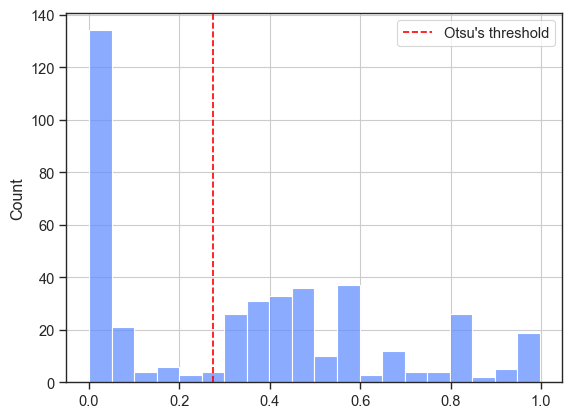

In [8]:
sns.histplot(all_frac_nans, bins=20)
plt.axvline(threshold, color="red", linestyle="--", label="Otsu's threshold")
plt.legend()
plt.show()

In [9]:
reduced_features = features.drop(mostly_nan_features, axis=1)

In [14]:
reduced_features.to_parquet("data/reduced_features.parquet")